<center><img src="https://i.imgur.com/tunvxE1.png" width="400" alt="ClearML" /> </center>
<br>
<p><font size="3" face="Arial" font-size="large"><ul type="square">
    
<li><a href="#c1">🔑 Ключевые особенности  </a></li>

<li><a href="#c2">📲 Регистрация учетной записи и вход в систему </a></li>
<li><a href="#с3">✍️⚡️ Залогируем эксперимент с обучением нейронки</a>
<li><a href="#c4">✌️ Как сравнить два эксперимента 🧐</a>
<li><a href="#c5">📝 Подведём итоги </a>

</li></ul></font></p>

# На что способен ClearML? 

`ClearML` - фреймворк нацеленный на упрощение ваших действий. Начиная с работы с данными и заканчивая построением pipeline'ов обучения. Также он умеет логировать ваши эксперименты, оптимизировать гиперпараметры и хранить код!

# <center id="c1">🔑 Ключевые особенности</center>
<div class="alert alert-info">



* Позволяет отслеживать работу вашего pipeline'a в режиме реального времени 
* EDA также сохраниться в графиках на странице запуска проекта
* Вы только обучаете модель - все остальное за вас делает `ClearML`. Не надо задумываться над тем сохранять или нет что-то. При возможности будет сохранено буквально все
* Так как сохраняется даже окружение, в котором работал ноутбук - мы получаем устойчивое решение, которое можем передать коллеге для дальнейшей работы
* Ничего нового не надо изучать - 2 строчки кода и вы подключили мощную систему мониторинга в свой проект.

# <center id="c2"> 📲 Регистрация учетной записи и вход в систему </center>
<div class="alert alert-info">
    
Для того, чтобы воспользоваться возможностью логировать ваш эксперимент на сервер вам нужно зарегестрироваться на сайте проекта и создать уникальный ключ API.


    
1. Если у вас нет учетной записи `ClearML`, вы можете перейти на https://clear.ml/ и создать Бесплатную учетную запись.
2. После успешной регистрации создаете новый секрет: https://app.clear.ml/settings/workspace-configuration

In [13]:
# Установка clearml
!pip install clearml tensorboard torchview -q

<div class="alert alert-info">

На `Kaggle` можно авторизоваться в `ClearML` двумя способами:

1. С помощью `!clearml-init`. Он запросит секрет, который вы можете скопировать + вставить.
2. Используя `Kaggle secrets` для хранения ключа API и использовать приведенный ниже фрагмент кода для входа в систему. Прочтите это [обсуждение](https://www.kaggle.com/product-feedback/114053), чтобы узнать больше о Kaggle secrets. В этом случае удобно будет скопировать код из раздела `Jupyter Notebook`

<div class="alert alert-info">

```python
from kaggle_secrets import UserSecretsClient
from clearml import Task

user_secrets = UserSecretsClient()
clearml_key = user_secrets.get_secret("clearml_key") 
clearml_secret = user_secrets.get_secret("clearml_secret") 
Task.set_credentials(
     api_host="https://api.clear.ml",
     web_host="https://app.clear.ml",
     files_host="https://files.clear.ml",
     key=clearml_key,
     secret=clerml_secret
)
```
[Подробнее о входе в ClearML](https://clear.ml/docs/latest/docs/getting_started/ds/ds_first_steps).

Ячейка выше - `Kaggle`, Ячейка ниже - локальный `Jupyter Notebook`

In [1]:
from getpass import getpass
from clearml import Logger, Task

In [2]:
# Введите поочерёдно полученные ключи в появившемся окне (код изменять не нужно)
access_key = getpass(prompt="Введите API Access токен: ")
secret_key = getpass(prompt="Введите API Secret токен: ")

Введите API Access токен:  ········
Введите API Secret токен:  ········


Чтобы `ClearML` заработал в нашем проекте, нужно добавить значения в переменные среды операционной системы.

In [7]:
%%capture
#  Не показывать свои api-ключи
%env CLEARML_WEB_HOST=https://app.clear.ml/
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml

%env CLEARML_API_ACCESS_KEY=$access_key
%env CLEARML_API_SECRET_KEY=$secret_key

## <center id="c3">✍️⚡️ Залогируем эксперимент с обучением нейронки<center>

<div class="alert alert-info">

В `ClearML` существует 3 сущности для логирования:
* `Task` -  модуль, с помощью которого создается эксперимент и подгружаются гиперпараметры
* `Logger` - подгрузка данных. Табличные, звук, картинки и тд.
* `Pipeline` - построение автоматизированных решений. _Пока_не рассматриваем_

<div class="alert alert-success">

**Основные правила логирования и как это делать в `ClearML`**:

1. Что сохранять, а что не надо?
Придерживайтесь правила: влияет ли этот параметр на эксперимент?  Если без него код не запускается - залогируйте его!
Если у вас много данных - возможно не стоит сохранять их целиком, а запомнить только контрольную выборку, на которой можно проверить все ваши идеи.<br>
Но модели всегда стоит сохранять! 

2. Как это делать в `ClearML`?
Несмотря на особенность `ClearML` логировать все автоматически - он не сохранит ваши гиперпараметры и данные.


_Для логирования параметров запуска_:
```python
task.connect(
    cfg_dict, # Словарь параметров (поддерживает не только параметры, но рекоммендуем словарь)
    "name_of_config", # Название параметров (модели, датасета и тд)
);
```

_Сохранение датасетов_:
Необходимо сначала получить класс `Logger` после инициализации эксперимента
```python
logger = Logger.current_logger()
```

Далее вызываем метод `report_table`:
```python
logger.report_table(
    title='name_of_data', # Как называется ваш датасет
    series='type_of_data', # Тип данных (train_data, feature_importance)
    table_plot=pd_dataframe, # Что репортим
)
```

_Если необходимо сохранить скалярную величину_:
```python
logger.report_scalar(
    title='Loss', # За что отвечает 
    series='Train',
    value=your_value,
)
```

Также если вы решаете не табличную задачу, а например задачу компьютерного зрения - у `ClearML` есть возможности сохранения картинок и другого рода данных с ними можно [ознакомиться здесь](https://clear.ml/docs/latest/docs/guides/reporting/explicit_reporting#)

### Настраиваемся на работу

In [1]:
import copy
from dataclasses import dataclass, asdict
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter

In [3]:
# Для корректного отображения схемы нейронки
import graphviz
graphviz.set_jupyter_format('png')

'svg'

In [2]:
# Создаём класс Config для удобного обращения к гиперпараметрам будущей нейронки
# можно попробовать поэкспериментировать с параметрами
@dataclass
class CFG:
    project_name: str = "ML Instruments Course"
    experiment_name: str = "PyTorch model baseline"
    
    train_name: str = "quickstart_train.csv"
    seed: int = 2024
    device: str = "cpu"  # 'cuda'
    hidden_size: int = 128
    dropout: float = 0.1
    lr: float = 1e-3
    batch_size: int = 128
    num_workers: int = 4
    epochs: int = 20

# Чтобы сохранить конфигурацию текущего эксперимента, перенесём её в словарь cfg_dict
cfg = CFG()
cfg_dict = asdict(cfg)
cfg_dict

{'project_name': 'ML Instruments Course',
 'experiment_name': 'PyTorch model baseline',
 'train_name': 'quickstart_train.csv',
 'seed': 2024,
 'device': 'cpu',
 'hidden_size': 128,
 'dropout': 0.1,
 'lr': 0.001,
 'batch_size': 128,
 'num_workers': 4,
 'epochs': 20}

In [4]:
# ВАЖНО! - фиксируем воспроизводимость
def seed_everything(seed=2024):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(cfg.seed)

<div class="alert alert-info">
    
**Подключаем магию ClearML**

In [12]:
# Создаем эксперимент
task = Task.init(
    project_name=cfg.project_name, # Задаем имя проекта/соревнования
    task_name=cfg.experiment_name # С чем экспериментируем
)
task.add_tags(['baseline', 'model']) # Рекомендуем добавлять тэги запусков: feature_engineering, model_tuning и тд
logger = Logger.current_logger()

ClearML Task: created new task id=b070abb7302e45bdbc499e9147ce7b7b
2024-11-19 16:59:46,654 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/d49e3d77f8ec41718fd682d65812cafb/experiments/b070abb7302e45bdbc499e9147ce7b7b/output/log
ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


<div class="alert alert-success">
<img width="400" src="https://i.imgur.com/1yWdGIO.png" style="float: right; margin-right: 1em;"/>

И все 🤯 Это минимальный рабочий набор необходимый для логирования эксперимента с помощью `ClearML`! <br>
Остальной функционал нужен для подгрузки данных, метрик и конфигов. 

In [14]:
# Сохраняем в наш task словарь с параметрами эксперимента
task.connect(
    cfg_dict,  # Лучше всего передавать словарь
    "Basic Config",  # Комментарий, что подгружаем
);

<div class="alert alert-info">

#### Готовим данные для обучения модели

Если вы уже проходили наш курс по `Соревновательному DS`, то вам уже знаком этот датасет и сетка. Если нет, то для примера взят датасет с поездками автомобилей каршеринговой компании. В датасете 2 таргета: время до поломки (регрессионный) и вид ожидаемой поломки (классификация).

### 🤹 Подгружаем dataset

In [3]:
rides_info = pd.read_csv('https://github.com/a-milenkin/ml_instruments/raw/refs/heads/main/data/quickstart_train.csv')
rides_info.head(3)

,car_id,model,car_type,fuel_type,car_rating,year_to_start,riders,year_to_work,target_reg,target_class,mean_rating,distance_sum,rating_min,speed_max,user_ride_quality_median,deviation_normal_count,user_uniq
0,y13744087j,Kia Rio X-line,economy,petrol,3.78,2015,76163,2021,109.99,another_bug,4.737759,1.214131e+07,0.1,180.855726,0.023174,174,170
1,O41613818T,VW Polo VI,economy,petrol,3.90,2015,78218,2021,34.48,electro_bug,4.480517,1.803909e+07,0.0,187.862734,12.306011,174,174
2,d-2109686j,Renault Sandero,standart,petrol,6.30,2012,23340,2017,34.93,gear_stick,4.768391,1.588366e+07,0.1,102.382857,2.513319,174,173


In [17]:
# Залогируем наш исходный датасет, если он будет очень большим, лучше так не делать!
logger.report_table(
    title='Start data', # Название таблицы или метрика, получаемая на этих данных :)
    series='datasets', # В каком разделе будут сохранены данные 
    table_plot=rides_info # DataFrame, csv, ссылка на csv
)

In [7]:
# Проводим препроцессинг данных для старта обучения
drop_cols = ["car_id", "target_reg", "target_class"]
cat_cols = ["car_type", "fuel_type", "model"]
rides_info = pd.get_dummies(rides_info, columns=cat_cols)
rides_info.fillna(rides_info.median(numeric_only=True), inplace=True)
num_cols = [col for col in list(rides_info.columns) if col not in drop_cols]

In [8]:
# для нормализуем данные и кодируем таргет
scaler = RobustScaler()
le = LabelEncoder()

df = scaler.fit_transform(rides_info[num_cols])
df = pd.DataFrame(df, columns=num_cols)

target_scaler = RobustScaler()
target = target_scaler.fit_transform(rides_info["target_reg"].values.reshape(-1, 1))

df["target_reg"] = target
df["target_class"] = le.fit_transform(rides_info["target_class"]).reshape((-1, 1))

In [23]:
# теперь залогируем после препроцессинга
logger.report_table(
    title='Transformed data',
    series='datasets',
    table_plot=rides_info
)

In [10]:
# Разбиваем датасет и логируем трэйн и тест выборки
train, test = train_test_split(df, test_size=0.2, random_state=cfg.seed)

cfg.num_features = train.shape[1] - 2  # количество фичей, подаваемое на вход
cfg.num_tar_class = (
    train.target_class.nunique()
)  # количество выходов равно количеству предсказываемых классов

logger.report_table(
    title='Train data',
    series='datasets',
    table_plot=train
)

logger.report_table(
    title='Test data',
    series='datasets',
    table_plot=test
)

[]

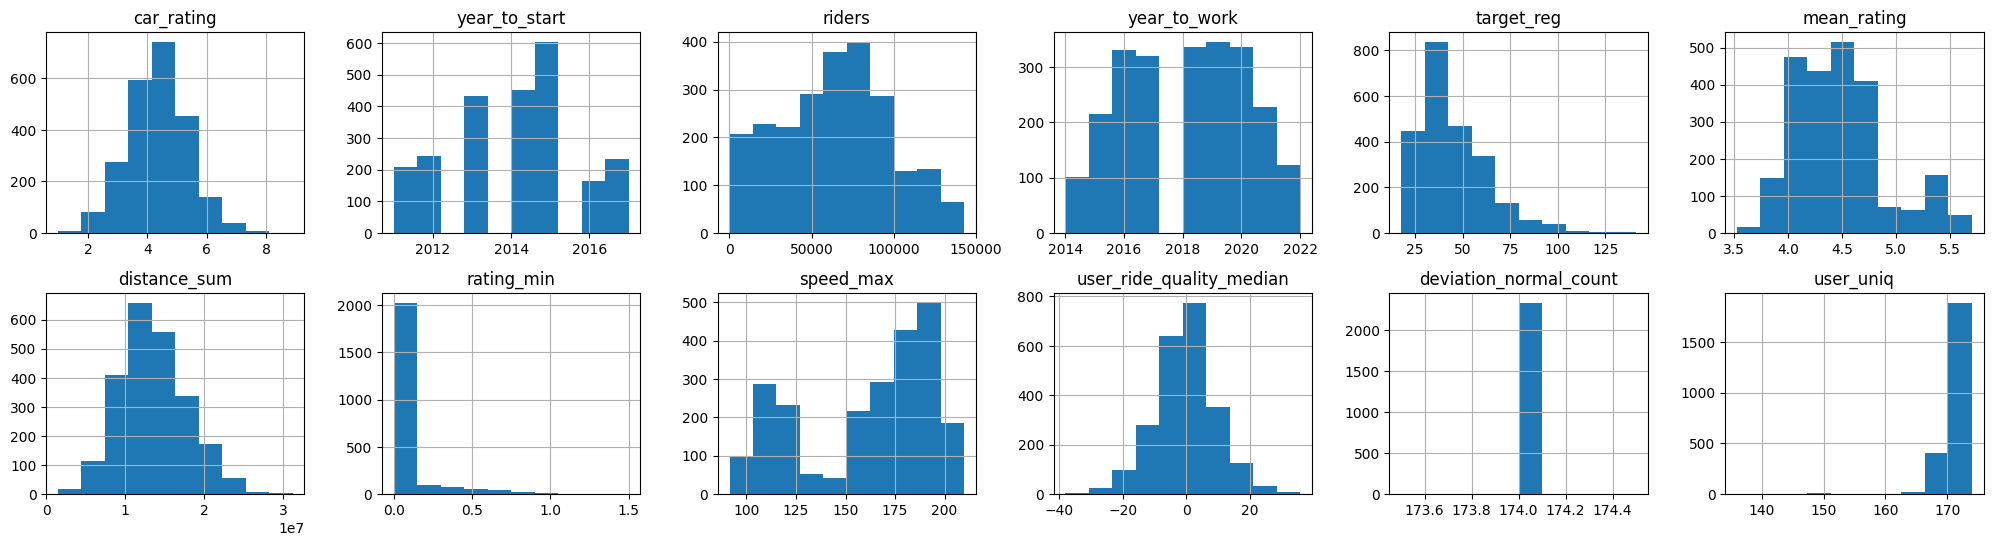

In [25]:
rides_info.hist(figsize=(25, 6), layout=(-1, 6))
plt.plot()

<div class="alert alert-info">


### 🖼 Логирование графики

Ещё одна фишка ClearML - это автоматическое логирование графики Matpltlib и Seaborn:
* Любой вызов plt.show() логируется без дополнительного кода
* Так же можно логировать графику с использованием специального метода
  ```python
  logger.report_matplotlib_figure(
        title="Class Balance",
        series="Plot as an image",
        iteration=0,
        figure=plt,
        report_image=True)
  ```
Далее вся графика отобразится на вкладке `Plots`.

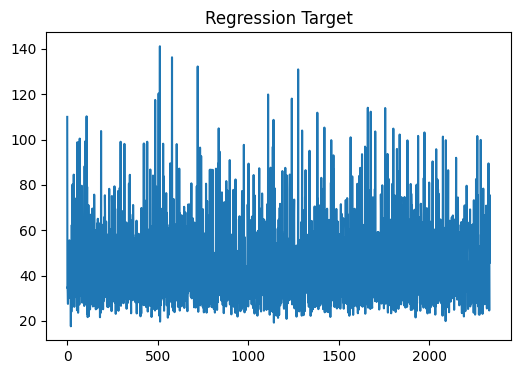

In [4]:
# Посмотрим для примера, ка залогируется такой график
plt.figure(figsize=(6, 4))
rides_info['target_reg'].plot()
plt.title('Regression Target')
plt.show()

#### Создаём класс `Dataset` для `PyTorch`

In [11]:
# датасет выдает фичи и значения целевых переменных
class Rides(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx, :]

        data = row.drop(labels=["target_reg", "target_class"])
        data = torch.FloatTensor(data.values.astype("float"))
        tar_reg = torch.tensor(row["target_reg"]).float()
        tar_class = row["target_class"].astype("int")

        return data, tar_reg, tar_class

In [12]:
train_datasets = {"train": Rides(train), "val": Rides(test)}

In [13]:
dataloaders_dict = {
    x: torch.utils.data.DataLoader(
        train_datasets[x],
        batch_size=cfg.batch_size,
        shuffle=True,
        num_workers=cfg.num_workers,
    )
    for x in ["train", "val"]
}

<div class="alert alert-info">

#### Построим архитектуру mlp с двумя головами для регрессии и классифкации на `PyTorch`

In [14]:
class TabularNN(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # Напишем простенькую нейронку
        self.mlp = nn.Sequential(
            nn.Linear(cfg.num_features, cfg.hidden_size),
            # nn.BatchNorm1d(cfg.hidden_size),
            nn.Dropout(cfg.dropout),
            nn.ReLU(),
            nn.Linear(cfg.hidden_size, cfg.hidden_size),
            # nn.BatchNorm1d(cfg.hidden_size),
            nn.Dropout(cfg.dropout),
            nn.ReLU(),
            nn.Linear(cfg.hidden_size, cfg.hidden_size // 2),
        )
        # Так как два таргета, делаем две головы - одна для регрессии, другая - классификации
        self.regressor = nn.Sequential(nn.Linear(cfg.hidden_size // 2, 1))
        self.classifier = nn.Sequential(
            nn.Linear(cfg.hidden_size // 2, cfg.num_tar_class)
        )

    def forward(self, data):
        x = self.mlp(data)
        tar_reg = self.regressor(x)
        tar_class = self.classifier(x)
        return tar_reg.view(-1), tar_class

In [15]:
model = TabularNN(cfg).to(cfg.device)

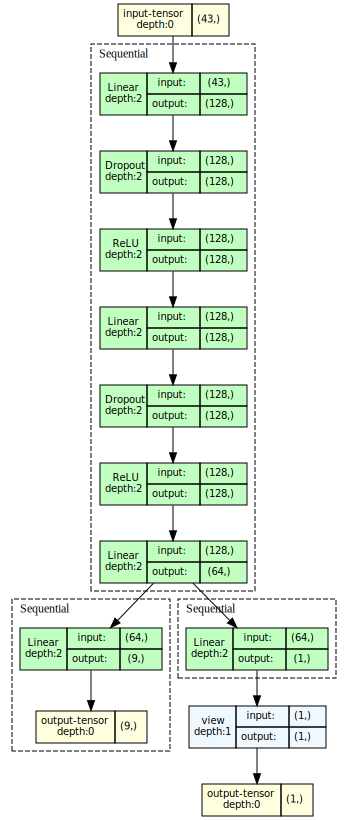

In [54]:
# Посмотрим какая модель у нас получилась
from torchview import draw_graph


model_graph = draw_graph(TabularNN(cfg), input_size=[cfg.num_features], expand_nested=True)
model_graph.visual_graph

<div class="alert alert-warning">

По дефолту `ClearML` не умеет работать с чистым PyTorch, поэтому для отображения метрик на этапе обучения модели мы будем использовать `TensorBoard` и писать в него все значения.  
А его уже умеет перехватывать `ClearML`.

Далее в курсе мы рассмотрим более продвинутый инструмент с бесшовной интеграцией с `ClearML`.

In [41]:
# Задаем оптимизатор и два лосса - для разных таргетов
optimizer = torch.optim.Adam(model.parameters(), lr=cfg.lr)
regression_criterion = nn.MSELoss().to(cfg.device)
classification_criterion = nn.CrossEntropyLoss().to(cfg.device)

# Инициализируем объект класса SummaryWriter, который будет отвечать за логирование в нашем train loop.
writer = SummaryWriter() 

In [42]:
def train_model(
    model,
    dataloaders,
    regression_criterion,
    classification_criterion,
    optimizer,
    num_epochs=25,
    early_stopping_rounds=5,
    verbose=2,
):

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss = np.inf
    early_steps = 0
    stop = False

    for epoch in range(num_epochs):
        if stop:
            break
        if epoch % verbose == 0:
            print("Epoch {}/{}".format(epoch, num_epochs - 1))
            print("-" * 10)

        # В каждой эпохе учимся на train и валидируемся на val
        for phase in ["train", "val"]:
            if phase == "train":
                model.train()  # Обучаем модельку
            else:
                model.eval()  # Тестируем ее

            running_loss = 0.0

            for inputs, labels_1, labels_2 in dataloaders[phase]:
                inputs = inputs.to(cfg.device)
                labels_1 = labels_1.to(cfg.device)
                labels_2 = labels_2.to(cfg.device)

                optimizer.zero_grad()

                # Включаем градиенты только на этапе обучения
                with torch.set_grad_enabled(phase == "train"):
                    outputs_1, outputs_2 = model(inputs)
                    loss_1 = regression_criterion(outputs_1, labels_1)
                    loss_2 = classification_criterion(outputs_2, labels_2)

                    loss = loss_1 + loss_2

                    # ‼️ Записываем результаты в TensorBoard для логирования в ClearML ‼️
                    writer.add_scalar(f'Loss1/{phase.title()}', loss_1, epoch)
                    writer.add_scalar(f'Loss2/{phase.title()}', loss_2, epoch)
                    writer.add_scalar(f'Loss/{phase.title()}', loss, epoch)

                    _, preds_2 = torch.max(outputs_2, 1)

                    # Распространим ошибку обратно
                    if phase == "train":
                        loss.backward()
                        optimizer.step()
                        # scheduler.step()

                running_loss += loss.item() * inputs.size(0)
                val_acc_history.append(running_loss)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            if epoch % verbose == 0:
                print("{} Loss: {:.4f}".format(phase, epoch_loss))
            
            # Сохраняем только лучшую модель
            if phase == "val" and epoch_loss < best_loss:
                best_model_wts = copy.deepcopy(model.state_dict())
                best_loss = epoch_loss
                early_steps = 0
            if phase == "val" and epoch_loss > best_loss:
                early_steps += 1
                if early_steps > early_stopping_rounds:
                    stop = True
                    print(f"Stopped by early_stopping. Epoch: {epoch}")
                    break

    # Подгружаем ее
    model.load_state_dict(best_model_wts)
    return model

In [43]:
model_ft = train_model(
    model,
    dataloaders_dict,
    regression_criterion,
    classification_criterion,
    optimizer,
    num_epochs=cfg.epochs,
)

Epoch 0/19
----------
train Loss: 2.7129
val Loss: 2.7183
Epoch 2/19
----------
train Loss: 2.2329
val Loss: 2.0930
Epoch 4/19
----------
train Loss: 1.6074
val Loss: 1.5600
Epoch 6/19
----------
train Loss: 1.3160
val Loss: 1.3278
Epoch 8/19
----------
train Loss: 1.1637
val Loss: 1.2083
Epoch 10/19
----------
train Loss: 1.0951
val Loss: 1.1791
Epoch 12/19
----------
train Loss: 1.0588
val Loss: 1.1622
Epoch 14/19
----------
train Loss: 1.0147
val Loss: 1.1376
Epoch 16/19
----------
train Loss: 1.0009
val Loss: 1.1513
Epoch 18/19
----------
train Loss: 0.9608
val Loss: 1.1191


<div class="alert alert-success">

Также еще одна killer-фича - `ClearML` умеет логировать ваши модели автоматически, куда бы вы их не сохранили!

‼️ Модель сохраняется автоматически, без вызова дополнительных функций!

In [45]:
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save('../models/model_scripted.pt') # Save

2024-11-19 17:17:26,760 - clearml.frameworks - INFO - Found existing registered model id=41fb300ac60544da94dd1ddf35a68765 [/app/storage_local/Course/ML_instruments/models/model_scripted.pt] reusing it.


<div class="alert alert-warning"> 

Также не забываем закончить эксперимент для нормального отображения на сайте `ClearML`, делается это командой `task.close()`

In [46]:
task.close()

После этого появляется новый эксперимент, в котором можно увидеть:
- `Execution`: Служебная информация какой файл запускался, в каком docker-контейнере
- `Configuration`: Все гиперпараметры хранятся тут
- `Artifacts`: Сохраненные модели будут подгружатся сюда. Также рендер ipynb файла сохраняется автоматически
- `Info`: Служебная информации о времени запуска, пользователе и тд
- `Console`: Весь терминальный вывод сохраняется автоматически 
- `Scalars`: Графики обучения из `TensorBoard`
- `Plots`: Графики `matplotlib` или данные `pandas`
- `Debug samples`: Вкладка, используемая при обучении моделей в сфере звука, картинок, видео 

![ClearML scalars](https://i.imgur.com/Eh2RUom.png)

# <center id=c4> ✌️ Как сравнить два эксперимента 🧐 </center>

<div class="alert alert-info">
Если вы пробуете оптимизировать модель - неизбежно пробуете несколько гипотез. После этого у вас плодятся запуски экспоненциально, и допустим, среди них надо выбрать пару лучших.

`ClearML` спешит помочь вам в этом деле! Давайте попробуем улучшить модель и посмотрим правда-ли она стала лучше.

Давайте немного поменяем гиперпараметры нашей нейронной сети и добавим  слой `BatchNorm`.

In [47]:
@dataclass
class CFG:
    project_name: str = "ML Instruments Course"
    experiment_name: str = "PyTorch model baseline more epochs, batchnorm"
    
    seed: int = 2024
    device: str = "cuda"  # 'cpu'
    hidden_size: int = 128
    dropout: float = 0.2
    lr: float = 1e-3
    batch_size: int = 128
    num_workers: int = 4
    epochs: int = 40

cfg = CFG()
cfg_dict = asdict(cfg)
cfg_dict

{'project_name': 'ML Instruments Course',
 'experiment_name': 'PyTorch model baseline more epochs, batchnorm',
 'seed': 2024,
 'device': 'cuda',
 'hidden_size': 128,
 'dropout': 0.2,
 'lr': 0.001,
 'batch_size': 128,
 'num_workers': 4,
 'epochs': 40}

In [48]:
# Создаем эксперимент
task = Task.init(
    project_name=cfg.project_name, 
    task_name=cfg.experiment_name
)
task.add_tags(['baseline', 'model', 'tuning']) # Добавим новый тег
logger = Logger.current_logger()

ClearML Task: created new task id=283709bfb2824febba1dfd18c05c6fe5
ClearML results page: https://app.clear.ml/projects/d49e3d77f8ec41718fd682d65812cafb/experiments/283709bfb2824febba1dfd18c05c6fe5/output/log
ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


In [49]:
# Также залогируем данные, чтобы не было путанницы в версиях датасетов

cfg.num_features = train.shape[1] - 2  # количество фичей, подаваемое на вход
cfg.num_tar_class = (
    train.target_class.nunique()
)  # количество выходов равно количеству предсказываемых классов

logger.report_table(
    title='Transformed data',
    series='datasets',
    table_plot=rides_info
)

logger.report_table(
    title='Train data',
    series='datasets',
    table_plot=train
)

logger.report_table(
    title='Test data',
    series='datasets',
    table_plot=test
)

In [50]:
# Добавим BatchNorm
class TabularNN(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # Напишем простенькую нейронку
        self.mlp = nn.Sequential(
            nn.Linear(cfg.num_features, cfg.hidden_size),
            nn.BatchNorm1d(cfg.hidden_size),
            nn.Dropout(cfg.dropout),
            nn.ReLU(),
            nn.Linear(cfg.hidden_size, cfg.hidden_size),
            nn.BatchNorm1d(cfg.hidden_size),
            nn.Dropout(cfg.dropout),
            nn.ReLU(),
            nn.Linear(cfg.hidden_size, cfg.hidden_size // 2),
        )
        # Так как два таргета, делаем две головы - одна для регрессии, другая - классификации
        self.regressor = nn.Sequential(nn.Linear(cfg.hidden_size // 2, 1))
        self.classifier = nn.Sequential(
            nn.Linear(cfg.hidden_size // 2, cfg.num_tar_class)
        )

    def forward(self, data):
        x = self.mlp(data)
        tar_reg = self.regressor(x)
        tar_class = self.classifier(x)
        return tar_reg.view(-1), tar_class

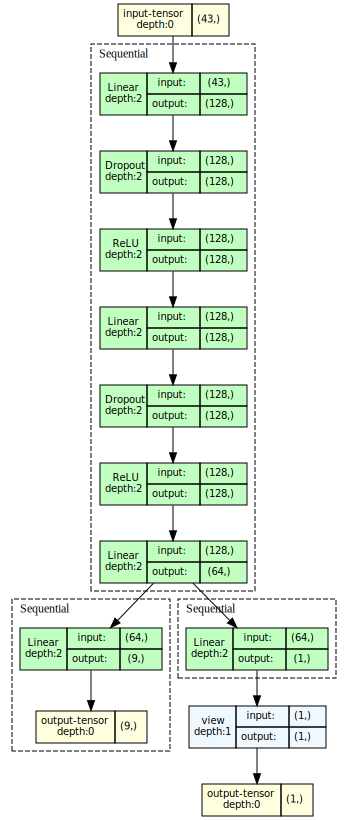

In [55]:
model_graph = draw_graph(TabularNN(cfg), input_size=[cfg.num_features], expand_nested=True)
model_graph.visual_graph

In [56]:
# Заново инициализируем классы во избежании ошибок
optimizer = torch.optim.Adam(model.parameters(), lr=cfg.lr)
regression_criterion = nn.MSELoss().to(cfg.device)
classification_criterion = nn.CrossEntropyLoss().to(cfg.device)
writer = SummaryWriter() 

In [57]:
model_ft = train_model(
    model,
    dataloaders_dict,
    regression_criterion,
    classification_criterion,
    optimizer,
    num_epochs=cfg.epochs,
)

Epoch 0/39
----------
train Loss: 0.9758
val Loss: 1.1367
Epoch 2/39
----------
train Loss: 0.9180
val Loss: 1.1473
Epoch 4/39
----------
train Loss: 0.9145
val Loss: 1.1266
Epoch 6/39
----------
train Loss: 0.9048
val Loss: 1.1342
Stopped by early_stopping. Epoch: 7


In [58]:
# Сохраняем веса модели
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save(f'../models/model_scripted_epochs-{cfg.epochs}.pt') # Save

In [59]:
# И не забываем завершить эксперимент
task.close()

#

<div class="alert alert-info">

Теперь мы можем сравнить два эскперимента, выбрав их галочкой и нажав `Compare`:

![ClearML Compare](https://i.imgur.com/0Gyd7yL.png)

# <center id=5> 📝 Подведём итоги </center>

<div class="alert alert-info">
    
* Запустили свой первый эксперимент в `ClearML` за 2 строчки кода 💯
* Залогировали модель, ничего не делая 😜
* Умеем сравнивать модели, не ломая глаза

+ С помощью ClearML можно логировать обучение любых ML и DL моделей, фрэймворк поддерживается большинством популярных библиотек машинного обучения.
+ Это стартер-ноутбук, полный функционал будем изучать в следующих модулях.